In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

'Connected: None@chinook.db'

In [2]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


In [8]:
%%sql
select 
    * 
from invoice_line where invoice_id = 2 ;

Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
17,2,3476,0.99,1
18,2,482,0.99,1
19,2,2701,0.99,1
20,2,1641,0.99,1
21,2,1119,0.99,1
22,2,2324,0.99,1
23,2,201,0.99,1
24,2,819,0.99,1
25,2,392,0.99,1
26,2,2651,0.99,1


In [6]:
%%sql 
select * from invoice limit 5;

Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.9
3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


In [9]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

# db = 'chinook.db'

# def run_query(q):
#     with sqlite3.connect(db) as conn:
#         return pd.read_sql(q, conn)

# def run_command(c):
#     with sqlite3.connect(db) as conn:
#         conn.isolation_level = None
#         conn.execute(c)
    
# def show_tables():
#     q = '''
#     SELECT
#         name,
#         type
#     FROM sqlite_master
#     WHERE type IN ("table","view")'''
#     return run_query(q)

# show_tables()

In [39]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view")

Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


genre, tracks sold, percentage sold

In [27]:
%%sql
with usa_tracks_sold as 
    (
    select il.* 
    from invoice_line il 
    left join invoice i on il.invoice_id = i.invoice_id
    left join customer c on c.customer_id = i.customer_id 
    where c.country = 'USA'
    )

select 
    g.name
    ,count(uts.invoice_line_id) as No_of_Tracks_sold
    ,ROUND(sum(uts.unit_price),2) as TotalSales
    ,ROUND(cast(count(uts.invoice_line_id) as float)/(select count(*) from usa_tracks_sold),2) as perc_of_tracks_
from usa_tracks_sold uts
left join track t on uts.track_id = t.track_id
left join genre g on t.genre_id = g.genre_id
group by 1
order by 2 desc

Done.


name,No_of_Tracks_sold,TotalSales,perc_of_tracks_
Rock,561,555.39,0.53
Alternative & Punk,130,128.7,0.12
Metal,124,122.76,0.12
R&B/Soul,53,52.47,0.05
Blues,36,35.64,0.03
Alternative,35,34.65,0.03
Latin,22,21.78,0.02
Pop,22,21.78,0.02
Hip Hop/Rap,20,19.8,0.02
Jazz,14,13.86,0.01


In [ ]:







select il.*
from invoice_line il 
left join track t on il.track_id = t.track_id
left join genre g on t.genre_id = g.genre_id


In [40]:
# albums_to_purchase = '''

%%sql
WITH usa_tracks_sold AS
    (
       SELECT il.*   
       FROM invoice_line il
       INNER JOIN invoice i on il.invoice_id = i.invoice_id
       INNER JOIN customer c on c.customer_id = i.customer_id
       WHERE c.country = "USA"
    )
SELECT
    g.name genre,
    count(uts.invoice_line_id) tracks_sold,
    ROUND((cast(count(uts.invoice_line_id) as float)/ (
    SELECT count(*) from usa_tracks_sold)),2) as percentage_sold
FROM usa_tracks_sold uts
INNER JOIN track t on uts.track_id = t.track_id
INNER JOIN genre g on t.genre_id = g.genre_id
GROUP BY 1
ORDER BY 2 DESC

# '''
# run_query(albums_to_purchase)

SyntaxError: invalid syntax (<ipython-input-40-a467d84fdb8e>, line 3)

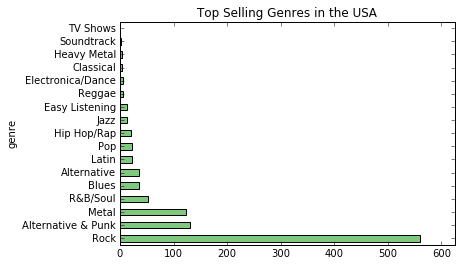

In [51]:
genre_sales_usa = run_query(albums_to_purchase)
genre_sales_usa.set_index("genre", inplace=True, drop=True)

genre_sales_usa["tracks_sold"].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0, 625),
    colormap=plt.cm.Accent
)



Based on the above numbers, the three most popular genre of music sold in US are Rock, Alternative & Punk, and Metal.
From the four albums in contention, I would go with Red Tone(Punk), Meteor and the Girls(Pop) and Slim Jim Bites(Blues)

# Analyzing Employee Sales Performance

In [56]:
%%sql

WITH customer_sales_rep_sales AS
    (
    SELECT 
        c.customer_id,
        c.support_rep_id,
        SUM(i.total) tot_sales
    FROM invoice i 
    INNER JOIN customer c on c.customer_id = i.customer_id
    GROUP BY c.customer_id, c.support_rep_id
    )
SELECT
    e.first_name || " " || e.last_name employee,
    e.hire_date,
    SUM(csrs.tot_sales) total_sales
FROM customer_sales_rep_sales csrs
INNER JOIN employee e on csrs.support_rep_id = e.employee_id
GROUP BY 1

Done.


employee,hire_date,total_sales
Jane Peacock,2017-04-01 00:00:00,1731.5099999999998
Margaret Park,2017-05-03 00:00:00,1584.0000000000002
Steve Johnson,2017-10-17 00:00:00,1393.92


# Analysing sales by country

tot_customer, tot sales, total sales/total customer avg sales, 
avg order value

customer invoive

In [57]:
%%sql

WITH country_or_other AS
    (
    SELECT
     CASE
        WHEN (
                SELECT
                    count(*) 
                FROM  customer
                WHERE country = c.country
             ) = 1 THEN "Other"
        ELSE c.country
     END AS country,
     c.customer_id,
     il.*
    FROM invoice_line il
    INNER JOIN invoice i ON il.invoice_id = i.invoice_id
    INNER JOIN customer c on i.customer_id = c.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM 
    (
    SELECT 
        country,
        COUNT(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort     
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );

Done.


country,customers,total_sales,average_order,customer_lifetime_value
USA,13,1040.490000000008,7.942671755725252,80.03769230769292
Canada,8,535.5900000000034,7.047236842105309,66.94875000000043
Brazil,5,427.68000000000245,7.011147540983647,85.53600000000048
France,5,389.0700000000021,7.781400000000042,77.81400000000042
Germany,4,334.6200000000016,8.161463414634186,83.6550000000004
Czech Republic,2,273.24000000000103,9.108000000000034,136.62000000000052
United Kingdom,3,245.52000000000078,8.768571428571457,81.84000000000026
Portugal,2,185.13000000000022,6.3837931034482835,92.56500000000011
India,2,183.1500000000002,8.72142857142858,91.5750000000001
Other,15,1094.9400000000085,7.448571428571486,72.99600000000056


genre_sales_usa = run_query(albums_to_purchase)

genre_sales_usa.set_index("genre", inplace=True, drop=True)

genre_sales_usa["tracks_sold"].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0, 625),
    colormap=plt.cm.Accent
)

plt.ylabel('')

for i, label in enumerate(list(genre_sales_usa.index)):
    score = genre_sales_usa.loc[label, "tracks_sold"]
    label = (genre_sales_usa.loc[label, "percentage_sold"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))

plt.show()

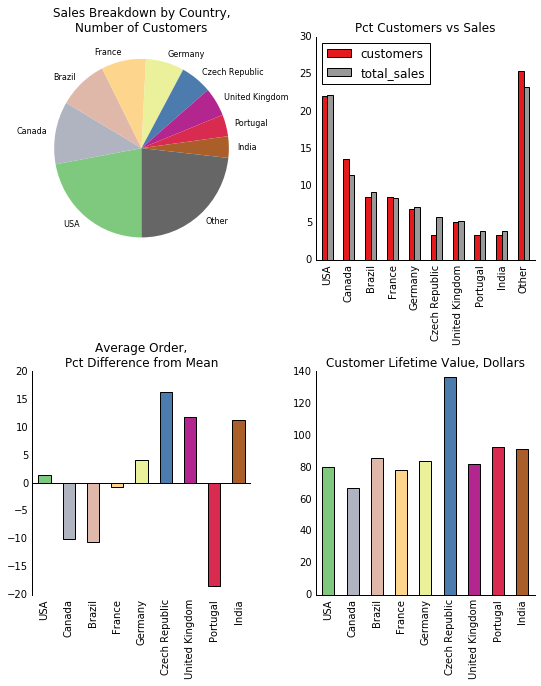

In [7]:
country_metrics = run_query(sales_by_country)
country_metrics.set_index("country", drop=True, inplace=True)
colors = [plt.cm.Accent(i) for i in np.linspace(0, 1, country_metrics.shape[0])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)

# top left
sales_breakdown = country_metrics["total_sales"].copy().rename('')
sales_breakdown.plot.pie(
    ax=ax1,
    startangle=-90,
    counterclock=False,
    title='Sales Breakdown by Country,\nNumber of Customers',
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0}   
)

# top right
cvd_cols = ["customers","total_sales"]
custs_vs_dollars = country_metrics[cvd_cols].copy()
custs_vs_dollars.index.name = ''
for c in cvd_cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum() / 100
custs_vs_dollars.plot.bar(
    ax=ax2,
    colormap=plt.cm.Set1,
    title="Pct Customers vs Sales"
)
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

# bottom left
avg_order = country_metrics["average_order"].copy()
avg_order.index.name = ''
difference_from_avg = avg_order * 100 / avg_order.mean() - 100
difference_from_avg.drop("Other", inplace=True)
difference_from_avg.plot.bar(
    ax=ax3,
    color=colors,
    title="Average Order,\nPct Difference from Mean"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
ax3.axhline(0, color='k')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

# bottom right
ltv = country_metrics["customer_lifetime_value"].copy()
ltv.index.name = ''
ltv.drop("Other",inplace=True)
ltv.plot.bar(
    ax=ax4,
    color=colors,
    title="Customer Lifetime Value, Dollars"
)
ax4.tick_params(top="off", right="off", left="off", bottom="off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

plt.show()

In [8]:
sales_breakdown

country
USA               1040.49
Canada             535.59
Brazil             427.68
France             389.07
Germany            334.62
Czech Republic     273.24
United Kingdom     245.52
Portugal           185.13
India              183.15
Other             1094.94
Name: , dtype: float64

# Album vs Indivisual Tracks

In [11]:
albums_vs_tracks = '''
WITH invoice_first_track AS 
    (
    SELECT 
        il.invoice_id invoice_id,
        MIN(track_id) first_track_id
    FROM invoice_line il
    GROUP BY 1
    )

SELECT
    album_purchase,
    count(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT)/ (SELECT COUNT(*) FROM invoice) percent
FROM (
    SELECT 
        ift.*,
        CASE
            WHEN
                (
                SELECT t.track_id FROM track t
                WHERE t.album_id = (
                                    SELECT t2.album_id FROM track t2
                                    WHERE t2.track_id = ift.first_track_id
                                   )
                EXCEPT
                
                SELECT il2.track_id FROM invoice_line il2
                WHERE il2.invoice_id = ift.invoice_id
                ) IS NULL
            AND 
                (
                SELECT il2.track_id FROM invoice_line il2
                WHERE il2.invoice_id = ift.invoice_id
                
                EXCEPT
                
                SELECT t.track_id FROM track t
                WHERE t.album_id = (
                                    SELECT t2.album_id FROM track t2
                                    WHERE t2.track_id = ift.first_track_id
                                   )
                ) IS NULL
            THEN "yes"
            ELSE "no"
        END as "album_purchase"
    FROM invoice_first_track ift
    )
GROUP BY album_purchase;
'''

run_query(albums_vs_tracks)

,album_purchase,number_of_invoices,percent
0,no,500,0.814332
1,yes,114,0.185668


18% of total invoices are album purchases. Thus I would not recommend them to stop buying full albums from record companies